In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

%cd "/content/drive/My Drive/data/audio"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/data/audio


In [2]:
!pip install librosa
!pip install mir_eval

!apt-get install ffmpeg  
#!apt-get install frei0r-plugins 

    100% |████████████████████████████████| 1.6MB 9.1MB/s 
    100% |████████████████████████████████| 327kB 12.2MB/s 
    100% |████████████████████████████████| 3.2MB 7.7MB/s 
    100% |████████████████████████████████| 16.1MB 1.9MB/s 
  Running setup.py bdist_wheel for librosa ... - \ done
  Stored in directory: /root/.cache/pip/wheels/18/b8/10/f0f8f6ac60668a5cd75596cf14c25bb6b3ea1ecd815f058b7e
  Running setup.py bdist_wheel for audioread ... - done
  Stored in directory: /root/.cache/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... - \ done
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy
    100% |████████████████████████████████| 92kB 4.8MB/s 
  Running setup.py bdist_wheel for mir-eval ... - \ done
  Stored in directory: /root/.cache/pip/wheels/69/d2/fe/892fae0039b51e3774a92daac135e45268ff5f52f28

Loading and visualizing audio

Boilerplate code

In [1]:
# Enable plots in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

# Seaborn makes our plots prettier
import seaborn
seaborn.set(style = 'ticks')

# Import the audio playback widget
from IPython.display import Audio

# Useful to import
import numpy as np
import scipy

import mir_eval

import librosa
import librosa.display

ModuleNotFoundError: ignored

In [22]:
y, sr = librosa.load(librosa.util.example_audio_file(), duration = 20.0)

#y, sr = librosa.load('01_10003_1-04_Shri_Visvanatham.wav')
print(type(y), type(sr))

print(y.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(441000,) 22050


In [20]:
y[2000:3000]

array([-9.70714986e-02, -9.98796672e-02, -1.01952001e-01, -1.03097416e-01,
       -1.03142753e-01, -1.02127768e-01, -1.00211084e-01, -9.75648686e-02,
       -9.42922086e-02, -9.04484764e-02, -8.59386772e-02, -8.08233172e-02,
       -7.51782581e-02, -6.90381527e-02, -6.25961497e-02, -5.64118251e-02,
       -5.10542803e-02, -4.68728244e-02, -4.39864546e-02, -4.22885120e-02,
       -4.16705199e-02, -4.18133810e-02, -4.23858203e-02, -4.29952554e-02,
       -4.32668813e-02, -4.30249237e-02, -4.20783497e-02, -4.03100960e-02,
       -3.77372019e-02, -3.44254039e-02, -3.06566376e-02, -2.67445017e-02,
       -2.29349136e-02, -1.93651691e-02, -1.61917768e-02, -1.35293566e-02,
       -1.13798361e-02, -9.80206020e-03, -8.70210957e-03, -8.01012479e-03,
       -7.56505365e-03, -7.10331229e-03, -6.48366101e-03, -5.63098537e-03,
       -4.51519527e-03, -2.94119352e-03, -7.40649062e-04,  2.16987403e-03,
        5.81990415e-03,  1.00533701e-02,  1.46785965e-02,  1.95521787e-02,
        2.45983712e-02,  

In [17]:
441000/512

861.328125

In [16]:
D = librosa.stft(y)

D.shape

(1025, 862)

In [14]:
M = librosa.feature.melspectrogram(y = y, sr = sr)

print(type(M))

print(M.shape)

M

<class 'numpy.ndarray'>
(128, 862)


array([[2.63330644e-07, 2.54545751e-03, 6.94285062e-02, ...,
        6.82650763e-01, 6.99217964e-01, 1.66598646e+00],
       [1.48204295e-07, 1.16257764e-02, 1.33231536e+00, ...,
        1.42569010e+02, 8.27719211e+01, 6.53279247e+01],
       [3.64170428e-07, 2.34068424e-02, 5.07212652e+00, ...,
        1.13159491e+02, 4.63948096e+01, 3.69433695e+01],
       ...,
       [3.65634363e-10, 2.85678891e-08, 2.12918571e-06, ...,
        6.92383175e-04, 2.39479692e-04, 1.28280626e-04],
       [1.95074737e-10, 9.91002192e-09, 6.60153368e-07, ...,
        1.70764319e-04, 4.72554424e-05, 5.40546848e-05],
       [8.62272286e-12, 2.35881969e-10, 4.41610791e-08, ...,
        1.08729285e-05, 5.05433020e-06, 4.51769333e-06]])

In [0]:
Audio(data=y, rate=sr)


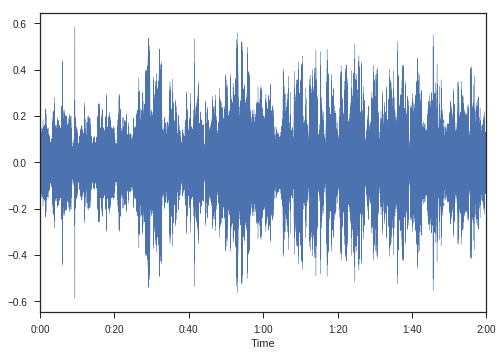

In [0]:
librosa.display.waveplot(y, sr)

In [0]:
D = librosa.stft(y)

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:865: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  warnings.warn('power_to_db was called on complex input so phase '


Text(0.5,1,'Linear-frequency power spectrogram')

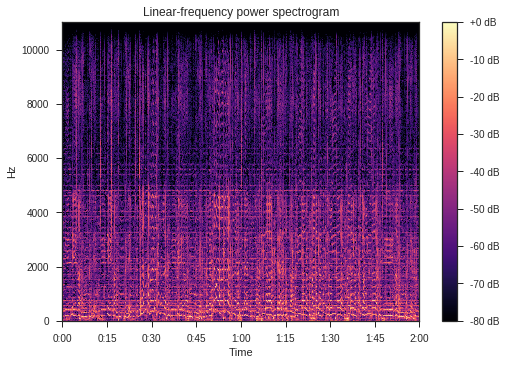

In [0]:
log_power = librosa.power_to_db(D**2, ref=np.max)
librosa.display.specshow(log_power, x_axis = 'time', y_axis= 'linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

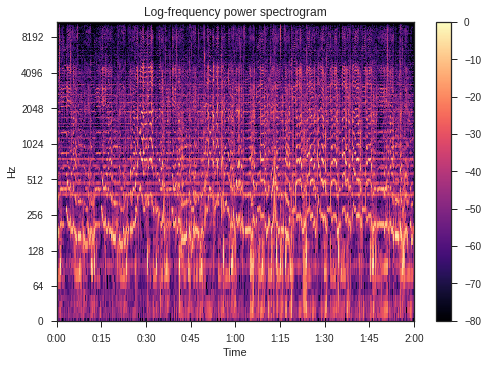

In [0]:
librosa.display.specshow(log_power, x_axis = 'time', y_axis= 'log')
#plt.colorbar(format='%+2.0f dB');
plt.colorbar();
plt.title('Log-frequency power spectrogram');

Text(0.5,1,'Constant-Q power spectrogram (Hz)')

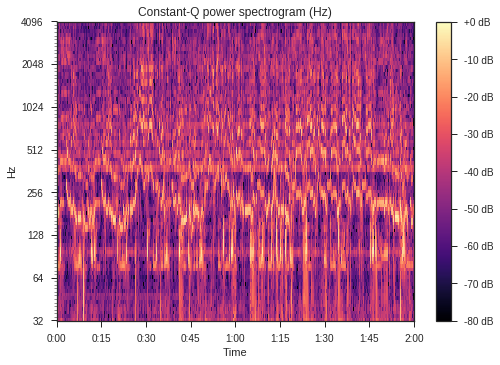

In [0]:
# direct log-frequency analysis
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr)), ref=np.max)
librosa.display.specshow(CQT,  x_axis = 'time', y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')

Text(0.5,1,'Constant-Q power spectrogram (Hz)')

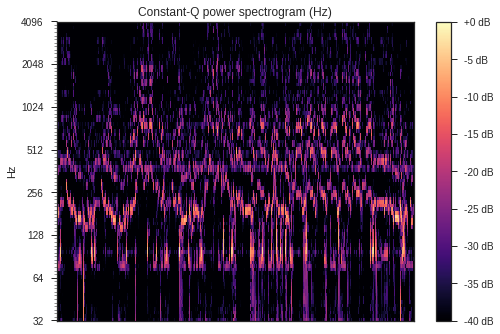

In [0]:
# default top_db = 80 dB
# reducing gives sparser image
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr)), ref=np.max, top_db=40)
librosa.display.specshow(CQT, y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')

In [0]:
#harmonic, percussive separation

y_harmonic, y_percussive = librosa.effects.hpss(y)

Audio(data=y, rate =sr)



In [0]:
Audio(data=y_harmonic, rate =sr)

In [0]:
Audio(data=y_percussive, rate=sr)

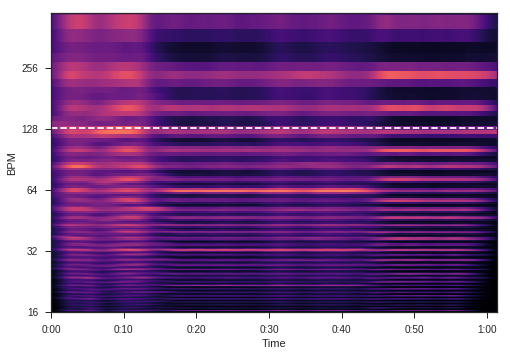

In [0]:
y, sr = librosa.load(librosa.util.example_audio_file())
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)

tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))

#plt.legend(frameon=True, framealpha=0.75)

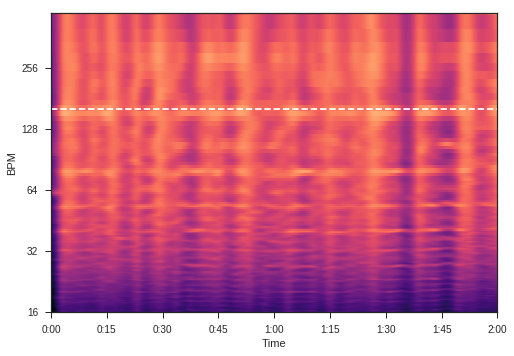

In [0]:
y, sr = librosa.load('01_10003_1-04_Shri_Visvanatham.wav')
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)

tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))

In [0]:
!pip install --upgrade youtube-dl

    100% |████████████████████████████████| 1.8MB 8.5MB/s 


In [0]:
!youtube-dl https://www.youtube.com/watch?v=BVomQtrtMTM&index=3&list=RDMM9RMHHwJ9Eqk

[youtube] BVomQtrtMTM: Downloading webpage
[youtube] BVomQtrtMTM: Downloading video info webpage
[youtube] BVomQtrtMTM: Downloading js player vfl718orE
[download] Destination: Tom Day - Who We Want To Be-BVomQtrtMTM.f247.webm
[download] 100% of 19.07MiB in 00:00
[download] Destination: Tom Day - Who We Want To Be-BVomQtrtMTM.f251.webm
[download] 100% of 6.73MiB in 00:00
[ffmpeg] Merging formats into "Tom Day - Who We Want To Be-BVomQtrtMTM.webm"
Deleting original file Tom Day - Who We Want To Be-BVomQtrtMTM.f247.webm (pass -k to keep)
Deleting original file Tom Day - Who We Want To Be-BVomQtrtMTM.f251.webm (pass -k to keep)


In [0]:
y, sr = librosa.load('tomday.webm')

In [0]:
Audio(data=y, rate=sr)


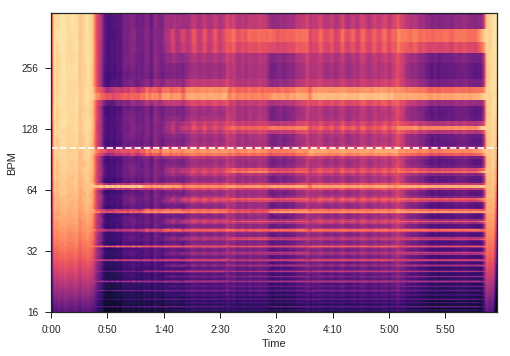

In [0]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)

tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))